# 🫀 Lovely Grad

> After all, you are only human.

::: {.content-visible when-format="markdown"}
## [Read full docs](https://xl0.github.io/lovely-grad) | ❤️ [Lovely Tensors](https://github.com/xl0/lovely-tensors) | 💘 [Lovely `JAX`](https://github.com/xl0/lovely-jax) | 💟 [Lovely `NumPy`](https://github.com/xl0/lovely-numpy)
:::

::: {.content-visible when-format="html"}
<h2><a href="https://github.com/xl0/lovely-grad">Source code</a> | ❤️ <a href="https://xl0.github.io/lovely-tensors"> Lovely Tensors</a> | 💘 <a href="https://xl0.github.io/lovely-jax">Lovely <tt>JAX</tt></a> | 💟 <a href="https://xl0.github.io/lovely-numpy"> Lovely <tt>NumPy</tt></a>
</h2>
:::

## Install

```sh
pip install lovely-grad
```
or

// Coming soon //
```sh
mamba install lovely-grad
```
or
```sh
conda install -c conda-forge lovely-grad
```

## How to use

In [ ]:
# Add this if you are running in a notebook ot tinygraad gets upset
import os; os.environ["DEBUG"] = "0"

In [ ]:
# |hide
from tinygrad.tensor import Tensor
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt, rcParams
from fastcore.test import test_eq

In [ ]:
# |hide
# torch.set_printoptions(linewidth=120)

In [ ]:
# |hide
np.set_printoptions(precision=4)
np.set_printoptions(threshold=3, suppress=True, edgeitems=2)
numbers = Tensor(np.load("mysteryman.npy").astype(np.float32))


How often do you find yourself debugging TinyGrad code? You dump a tensor to the cell output, and see this:

In [ ]:
# |hide
# from lovely_grad import monkey_patch; monkey_patch()

In [ ]:
# |hide
# A trick to make sure README.md shows the plain version.
# numbers = numbers.p

In [ ]:
numbers

<Tensor <LB (3, 196, 196) dtypes.float op:LoadOps.FROMCPU st:ShapeTracker(shape=(3, 196, 196), views=[View((3, 196, 196), (38416, 196, 1), 0, None)])> on CPU with grad None>

Or this

In [ ]:
numbers.numpy()

array([[[-0.3541, -0.3369, ..., -0.4739,  2.2489],
        [-0.4054, -0.4226, ..., -0.8507,  2.1633],
        ...,
        [-0.8507, -0.7822, ..., -1.5014,  2.1804],
        [-0.8335, -0.8164, ..., -1.5528,  2.1119]],

       [[-0.1975, -0.1975, ..., -0.3725,  2.4111],
        [-0.25  , -0.2325, ..., -0.6702,  2.3585],
        ...,
        [-0.3901, -0.2325, ..., -1.2304,  2.4111],
        [-0.4076, -0.285 , ..., -1.2829,  2.341 ]],

       [[-0.6715, -0.9853, ..., -0.689 ,  2.396 ],
        [-0.7238, -1.0724, ..., -1.0201,  2.3263],
        ...,
        [-1.1944, -1.4559, ..., -1.4733,  2.4308],
        [-1.2293, -1.5256, ..., -1.5256,  2.3611]]], dtype=float32)

Was it really useful for you, as a human, to see all these numbers?

What is the shape? The size?\
What are the statistics?\
Are any of the values `nan` or `inf`?

### Is it an image of a man holding a tench?

In [ ]:
from lovely_grad import monkey_patch; monkey_patch()

## Summary

In [ ]:
numbers

Tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073 CPU

Better, huh?

In [ ]:
numbers[1,:6,1] # Still shows values if there are not too many.

Tensor[6] x∈[-0.443, -0.197] μ=-0.311 σ=0.091 CPU Realized RESHAPE [-0.197, -0.232, -0.285, -0.373, -0.443, -0.338]

In [ ]:
spicy = numbers[0,:12,0].numpy() # Please add native support for this.
spicy[0] *= 10000.0
spicy[1] /= 10000.0
spicy[3] = np.Inf
spicy[4] = np.NINF
spicy[5] = np.NaN
spicy = Tensor(spicy).reshape(2,6)

spicy # Spicy stuff

Tensor[2, 6] n=12 x∈[-3.541e+03, -4.054e-05] μ=-393.827 σ=1.113e+03 +Inf! -Inf! NaN! CPU Realized RESHAPE

In [ ]:
Tensor.zeros(10, 10) # A zero tensor - make it obvious

Tensor[10, 10] n=100 all_zeros CPU Realized CONTIGUOUS

In [ ]:
spicy += 1 # Make ot lazy again
spicy.p # The plain old way

<Tensor <LB (2, 6) dtypes.float op:BinaryOps.ADD st:ShapeTracker(shape=(2, 6), views=[View((2, 6), (6, 1), 0, None)])> on CPU with grad None>

In [ ]:
spicy.v # Verbose

<Tensor <LB (2, 6) dtypes.float op:BinaryOps.ADD st:ShapeTracker(shape=(2, 6), views=[View((2, 6), (6, 1), 0, None)])> on CPU with grad None>
Tensor[2, 6] n=12 x∈[-3.540e+03, 1.000] μ=-392.827 σ=1.113e+03 +Inf! -Inf! NaN! CPU Realized ADD

## But I want to be lazy!

In [ ]:
from lovely_grad import set_config
from lovely_grad import config # This is a context manager by the way.

In [ ]:
set_config(auto_realize=False)
s = spicy+1
s # No realization

Tensor[2, 6] n=12 CPU Lazy ADD

In [ ]:
s # still lazy

Tensor[2, 6] n=12 CPU Lazy ADD

In [ ]:
set_config(auto_realize=True)
s # Will realize

Tensor[2, 6] n=12 x∈[-3.539e+03, 2.000] μ=-391.827 σ=1.113e+03 +Inf! -Inf! NaN! CPU Realized ADD

In [ ]:
s # Already realized

Tensor[2, 6] n=12 x∈[-3.539e+03, 2.000] μ=-391.827 σ=1.113e+03 +Inf! -Inf! NaN! CPU

## Going `.deeper`

In [ ]:
numbers.deeper

Tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073 CPU
  Tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036 CPU
  Tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973 CPU
  Tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178 CPU

In [ ]:
# You can go deeper if you need to
numbers[:,:3,:5].deeper(2)

Tensor[3, 3, 5] n=45 x∈[-1.316, -0.197] μ=-0.593 σ=0.306 CPU Realized SHRINK
  Tensor[3, 5] n=15 x∈[-0.765, -0.337] μ=-0.492 σ=0.124 CPU
    Tensor[5] x∈[-0.440, -0.337] μ=-0.385 σ=0.041 CPU [-0.354, -0.337, -0.405, -0.440, -0.388]
    Tensor[5] x∈[-0.662, -0.405] μ=-0.512 σ=0.108 CPU [-0.405, -0.423, -0.491, -0.577, -0.662]
    Tensor[5] x∈[-0.765, -0.474] μ=-0.580 σ=0.125 CPU [-0.474, -0.474, -0.542, -0.645, -0.765]
  Tensor[3, 5] n=15 x∈[-0.513, -0.197] μ=-0.321 σ=0.099 CPU
    Tensor[5] x∈[-0.303, -0.197] μ=-0.243 σ=0.055 CPU [-0.197, -0.197, -0.303, -0.303, -0.215]
    Tensor[5] x∈[-0.408, -0.232] μ=-0.327 σ=0.084 CPU [-0.250, -0.232, -0.338, -0.408, -0.408]
    Tensor[5] x∈[-0.513, -0.285] μ=-0.394 σ=0.102 CPU [-0.303, -0.285, -0.390, -0.478, -0.513]
  Tensor[3, 5] n=15 x∈[-1.316, -0.672] μ=-0.964 σ=0.176 CPU
    Tensor[5] x∈[-0.985, -0.672] μ=-0.846 σ=0.123 CPU [-0.672, -0.985, -0.881, -0.776, -0.916]
    Tensor[5] x∈[-1.212, -0.724] μ=-0.989 σ=0.179 CPU [-0.724, -1.072, -0.968,

## Now in `.rgb` color

The important queston - is it our man?

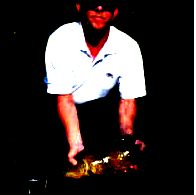

In [ ]:
numbers.rgb

_Maaaaybe?_ Looks like someone normalized him.

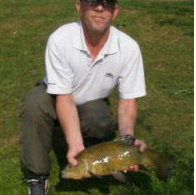

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean 
             (0.229, 0.224, 0.225) )    # std

# numbers.rgb(in_stats, cl=True) # For channel-last input format
numbers.rgb(in_stats)

It's indeed our hero, the Tenchman!

## `.plt` the statistics

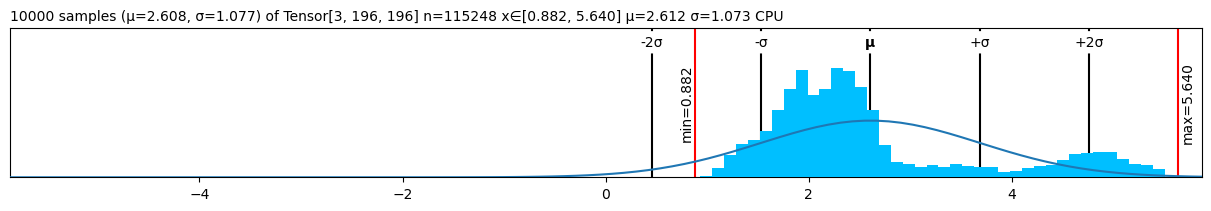

In [ ]:
(numbers+3).plt

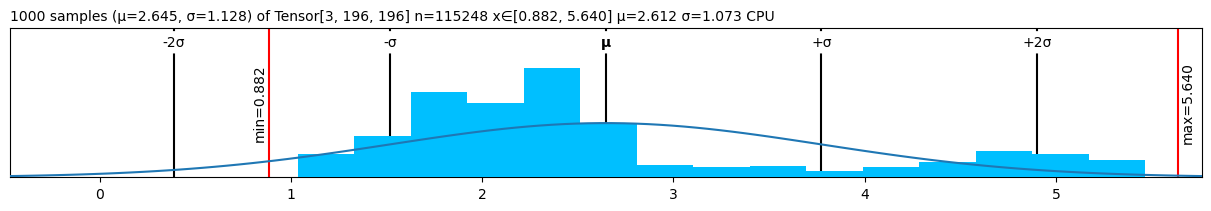

In [ ]:
(numbers+3).plt(center="mean", max_s=1000)

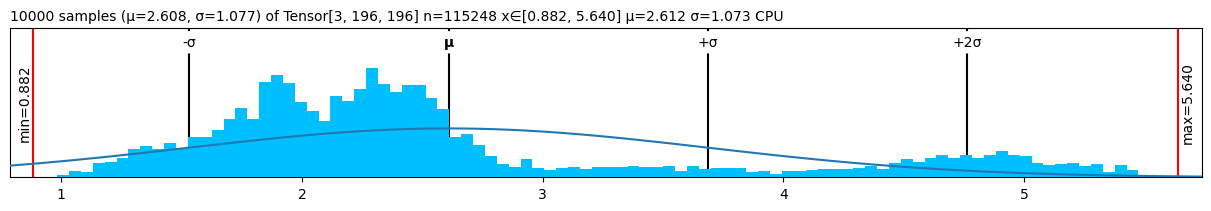

In [ ]:
(numbers+3).plt(center="range")

## See the `.chans`

In [ ]:
# .chans will map values betwen [-1,1] to colors.
# Make our values fit into that range to avoid clipping.
mean = Tensor(in_stats[0])[:,None,None]
std = Tensor(in_stats[1])[:,None,None]
numbers_01 = (numbers*std + mean)
numbers_01

Tensor[3, 196, 196] n=115248 x∈[0., 1.000] μ=0.361 σ=0.248 CPU Realized ADD

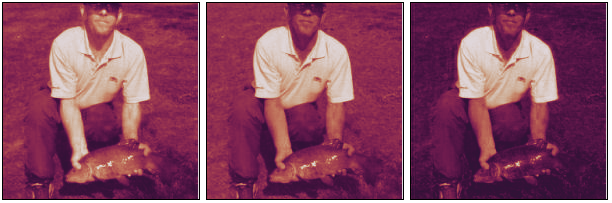

In [ ]:
numbers_01.chans

Let's try with a Convolutional Neural Network

In [ ]:
import torch
import tinygrad.nn as nn

In [ ]:
class VGG_top:
    """Top 6 layers (until 3rd conv) of VGG"""

    def __init__(self, weights=None):
        self.layers = [
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=True),
            Tensor.relu,
            Tensor.max_pool2d,
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=True),
            Tensor.relu,
            Tensor.max_pool2d,
        ]
        if weights:
            self.layers[0].weight = Tensor(weights["0.weight"].numpy())
            self.layers[0].bias = Tensor(weights["0.bias"].numpy())
            self.layers[3].weight = Tensor(weights["3.weight"].numpy())
            self.layers[3].bias = Tensor(weights["3.bias"].numpy())            

    def __call__(self, x: Tensor):
        return x.sequential(self.layers)

In [ ]:
tg_vgg = VGG_top(torch.load("features.pt"))

In [ ]:
acts = tg_vgg(numbers[None])/2
acts

Tensor[1, 128, 49, 49] n=307328 x∈[0., 12.508] μ=0.367 σ=0.634 CPU Realized MUL

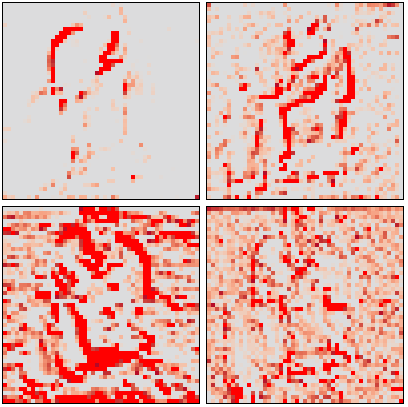

In [ ]:
acts[0,:4].chans(cmap="coolwarm", scale=4)

## Grouping

In [ ]:
# Make 8 images with progressively higher brightness and stack them 2x2x2.
eight_images = (Tensor.stack([numbers]*8) + Tensor(np.linspace(-2, 2, 8).astype(np.float32)).reshape(8,1,1,1))
eight_images = (eight_images
                    .mul(Tensor(in_stats[1]).reshape(1,3,1,1))
                    .add(Tensor(in_stats[0]).reshape(1,3,1,1))
                    .clip(0,1)
                    .reshape(2,2,2,3,196,196)
)
eight_images

Tensor[2, 2, 2, 3, 196, 196] n=921984 x∈[0., 1.000] μ=0.382 σ=0.319 CPU Realized RESHAPE

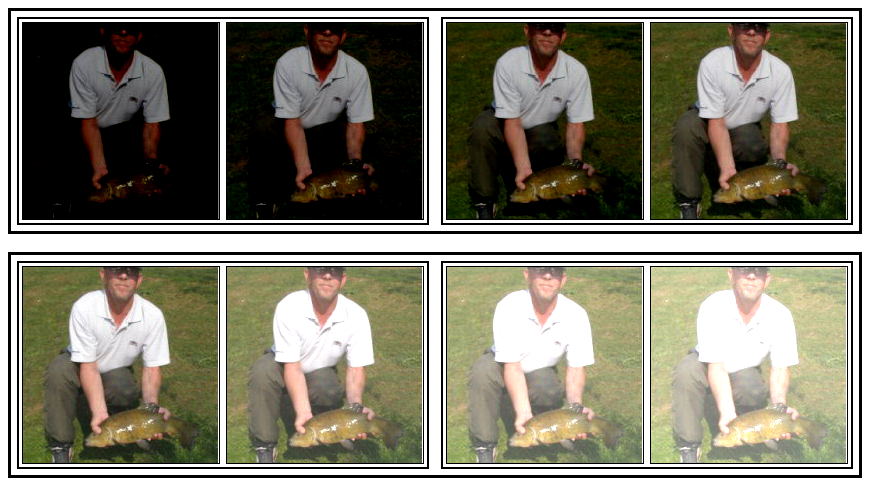

In [ ]:
eight_images.rgb

In [ ]:
# Weights of the second conv layer of VGG11
tg_vgg.layers[3].weight

Tensor[128, 64, 3, 3] n=73728 x∈[-0.783, 0.776] μ=-0.004 σ=0.065 CPU

I want +/- 2σ to fall in the range [-1..1]

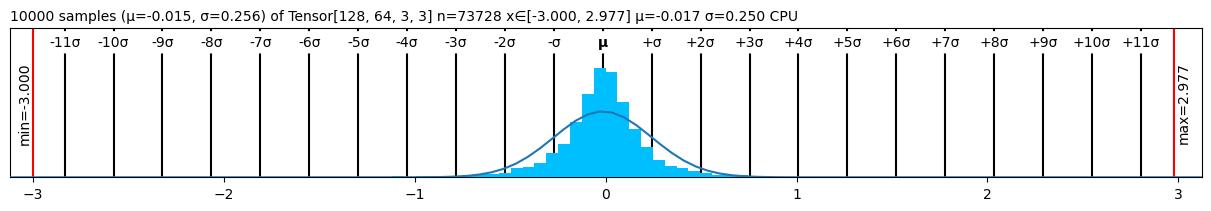

In [ ]:
weights = tg_vgg.layers[3].weight
weights = weights / (2*2*weights.std()) # *2 because we want 2σ on both sides, so 4σ
# weights += weights.std() * 2
weights.plt

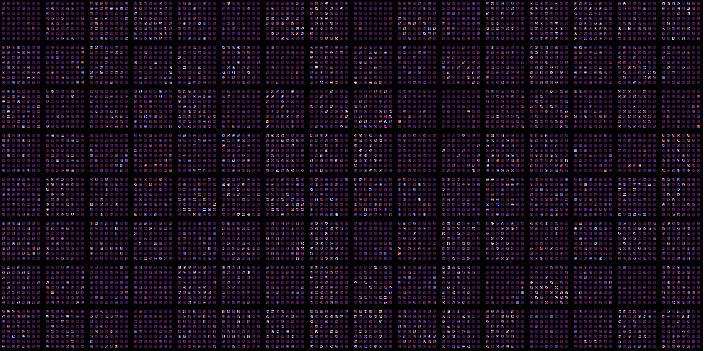

In [ ]:
# |eval:false
# Weights of the second conv layer (64ch -> 128ch) of VGG11,
# grouped per output channel.
weights.chans(frame_px=1, gutter_px=0)

It's a bit hard to see. Scale up 10x, but onyl show the first 4 filters.

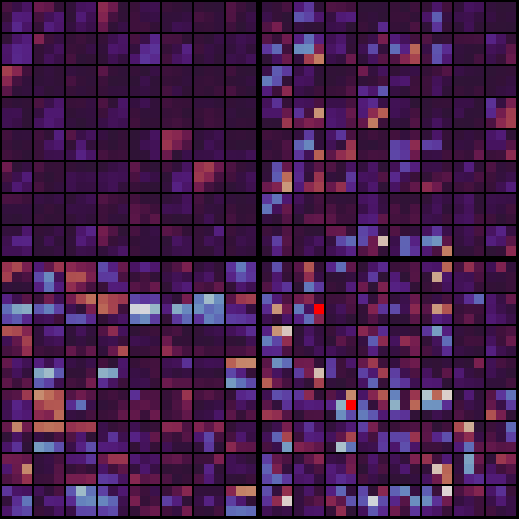

In [ ]:
# |eval:false
weights[:4].chans(frame_px=1, gutter_px=0, scale=10)

## Options | [Docs](https://xl0.github.io/lovely-tensors/utils.config.html)

In [ ]:
import lovely_grad as lg

In [ ]:
lg.set_config(precision=1, sci_mode=True, color=False)
Tensor([1, 2, float("NaN")])

Tensor[3] μ=1.5e+00 σ=5.0e-01 NaN! CPU Realized FROMCPU [1.0e+00, 2.0e+00, nan]

In [ ]:
lg.set_config(precision=None, sci_mode=None, color=None) # None -> Reset to defaults

In [ ]:
print(Tensor([1., 2]))
# Or with config context manager.
with lg.config(sci_mode=True, precision=5):
    print(Tensor([1., 2]))

print(Tensor([1., 2]))

Tensor[2] μ=1.500 σ=0.707 CPU Realized FROMCPU [1.000, 2.000]
Tensor[2] μ=1.50000e+00 σ=7.07107e-01 CPU Realized FROMCPU [1.00000e+00, 2.00000e+00]
Tensor[2] μ=1.500 σ=0.707 CPU Realized FROMCPU [1.000, 2.000]


## Without `.monkey_patch`

In [ ]:
lg.lovely(spicy)

Tensor[2, 6] n=12 x∈[-3.540e+03, 1.000] μ=-392.827 σ=1.113e+03 +Inf! -Inf! NaN! CPU

In [ ]:
lg.lovely(spicy, verbose=True)

<Tensor buffer<12, dtypes.float> on CPU with grad None>
Tensor[2, 6] n=12 x∈[-3.540e+03, 1.000] μ=-392.827 σ=1.113e+03 +Inf! -Inf! NaN! CPU

In [ ]:
lg.lovely(numbers, depth=1)

Tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073 CPU
  Tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036 CPU
  Tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973 CPU
  Tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178 CPU

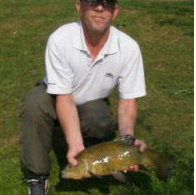

In [ ]:
lg.rgb(numbers, in_stats)

In [ ]:
lg.plot(numbers, center="mean")

AttributeError: module 'lovely_grad' has no attribute 'plot'

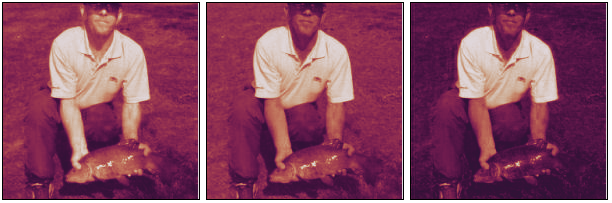

In [ ]:
lg.chans(numbers_01)

## Matplotlib integration | [Docs](https://xl0.github.io/lovely-tensors/matplotlib.html)

In [ ]:
# |hide

# Deterministic svg output
rcParams["svg.hashsalt"] = "1"

# No date, don't include matplotlib version
kwargs = {'metadata': {"Date": None, "Creator": "Matplotlib, https://matplotlib.org/" }} 
%config InlineBackend.print_figure_kwargs = kwargs

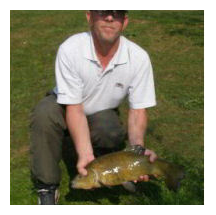

In [ ]:
numbers.rgb(in_stats).fig # matplotlib figure

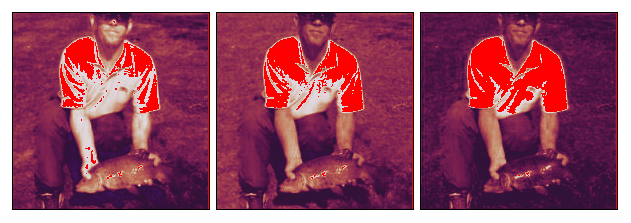

In [ ]:
(numbers*0.3+0.5).chans.fig # matplotlib figure

In [ ]:
numbers.plt.fig.savefig('pretty.svg') # Save it

In [ ]:
!file pretty.svg; rm pretty.svg

pretty.svg: SVG Scalable Vector Graphics image


### Add content to existing Axes

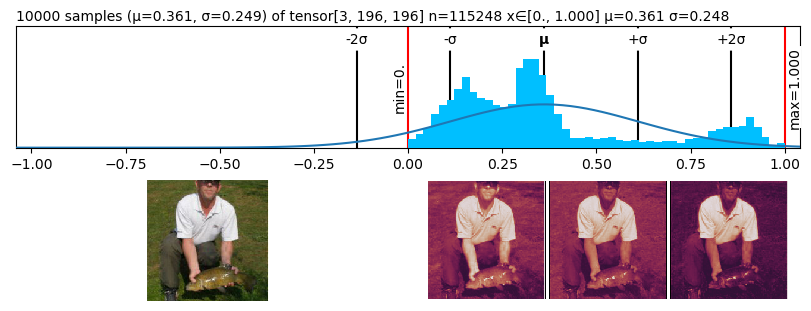

In [ ]:
fig = plt.figure(figsize=(8,3))
fig.set_constrained_layout(True)
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1,1:])

ax2.set_axis_off()
ax3.set_axis_off()

numbers_01.plt(ax=ax1)
numbers_01.rgb(ax=ax2)
numbers_01.chans(ax=ax3);